In [1]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import os

# Set style untuk visualisasi
plt.style.use('default')
sns.set_palette("husl")


In [2]:
# Fungsi untuk membaca dan menggabungkan data
def load_and_combine_data(file_patterns, fabric_types, data_type):
    dfs = []
    for fabric, pattern in file_patterns.items():
        try:
            df = pd.read_csv(pattern)
            df['Jenis_Kain'] = fabric
            df['Kategori'] = fabric_types[fabric]
            dfs.append(df)
        except FileNotFoundError:
            print(f"File {pattern} tidak ditemukan")
    
    combined_df = pd.concat(dfs, ignore_index=True)
    combined_df['Tipe_Data'] = data_type
    return combined_df

# Definisikan jenis kain dan kategorinya (Alami vs Sintetis)
fabric_categories = {
    'katun': 'Alami',
    'sutra': 'Alami',
    'polyester': 'Sintetis',
    'rayon': 'Sintetis'
}

# Dictionary untuk file-file data (sesuaikan dengan path yang benar)
rgb_files = {
    'katun': r'D:\Semester7\CV\identifikasi_kain\outputs\glcm_rgb_result\katun_glcm_result.csv',
    'sutra': r'D:\Semester7\CV\identifikasi_kain\outputs\glcm_rgb_result\sutra_glcm_result.csv',
    'polyester': r'D:\Semester7\CV\identifikasi_kain\outputs\glcm_rgb_result\polyester_glcm_result.csv',
    'rayon': r'D:\Semester7\CV\identifikasi_kain\outputs\glcm_rgb_result\rayon_glcm_result.csv'
}

nir_files = {
    'katun': r'D:\Semester7\CV\identifikasi_kain\outputs\glcm_nir_result\katun_nir_features.csv',
    'sutra': r'D:\Semester7\CV\identifikasi_kain\outputs\glcm_nir_result\sutra_nir_features.csv',
    'polyester': r'D:\Semester7\CV\identifikasi_kain\outputs\glcm_nir_result\polyester_nir_features.csv',
    'rayon': r'D:\Semester7\CV\identifikasi_kain\outputs\glcm_nir_result\rayon_nir_features.csv'
}

# Memuat data RGB
print("Memuat data RGB...")
rgb_data = load_and_combine_data(rgb_files, fabric_categories, 'RGB')

# Memuat data NIR
print("Memuat data NIR...")
nir_data = load_and_combine_data(nir_files, fabric_categories, 'NIR')

# Menggabungkan semua data
all_data = pd.concat([rgb_data, nir_data], ignore_index=True)

# Menampilkan informasi dataset
print("\nInformasi Dataset:")
print(f"RGB Data Shape: {rgb_data.shape}")
print(f"NIR Data Shape: {nir_data.shape}")
print(f"All Data Shape: {all_data.shape}")

# Menampilkan preview data
print("\nPreview Data RGB:")
display(rgb_data.head())

print("\nPreview Data NIR:")
display(nir_data.head())


Memuat data RGB...
Memuat data NIR...

Informasi Dataset:
RGB Data Shape: (120, 28)
NIR Data Shape: (120, 12)
All Data Shape: (240, 36)

Preview Data RGB:


,filename,mean_R,mean_G,mean_B,contrast_R,dissimilarity_R,homogeneity_R,energy_R,correlation_R,asm_R,...,contrast_B,dissimilarity_B,homogeneity_B,energy_B,correlation_B,asm_B,entropy_B,Jenis_Kain,Kategori,Tipe_Data
0,katun_rgb_01.jpg,170.406291,166.408992,163.289820,0.426243,0.368963,0.821244,0.409565,0.710960,0.168130,...,0.434165,0.376113,0.817746,0.403340,0.722373,0.163068,12.576101,katun,Alami,RGB
1,katun_rgb_02.jpg,169.900813,165.945546,162.863991,0.516757,0.422254,0.798314,0.376916,0.709123,0.142426,...,0.526272,0.430927,0.794062,0.366485,0.721009,0.134671,13.610501,katun,Alami,RGB
2,katun_rgb_03.jpg,169.696149,165.714474,162.687128,0.454626,0.383090,0.815603,0.404576,0.703373,0.164045,...,0.461839,0.389694,0.812362,0.395719,0.721722,0.156953,12.882387,katun,Alami,RGB
3,katun_rgb_04.jpg,169.227814,165.259479,162.397206,0.435827,0.370071,0.821535,0.414609,0.701985,0.172258,...,0.443604,0.377461,0.817879,0.402594,0.725652,0.162435,12.703689,katun,Alami,RGB
4,katun_rgb_05.jpg,170.427607,166.687460,163.789242,0.469509,0.394839,0.810043,0.394455,0.715281,0.155968,...,0.478284,0.402880,0.806096,0.378544,0.738846,0.143665,13.263207,katun,Alami,RGB



Preview Data NIR:


,filename,mean_nir,contrast,dissimilarity,homogeneity,energy,correlation,asm,entropy,Jenis_Kain,Kategori,Tipe_Data
0,katun_nir_01.jpg,125.524595,0.168672,0.168672,0.915664,0.540716,0.823389,0.292763,8.962248,katun,Alami,NIR
1,katun_nir_02.jpg,125.161869,0.170951,0.170951,0.914525,0.539271,0.821066,0.291211,8.978024,katun,Alami,NIR
2,katun_nir_03.jpg,125.266383,0.169815,0.169815,0.915093,0.539463,0.822924,0.291445,8.976122,katun,Alami,NIR
3,katun_nir_04.jpg,125.329034,0.170456,0.170456,0.914772,0.539887,0.821743,0.291907,8.973978,katun,Alami,NIR
4,katun_nir_05.jpg,124.979867,0.171896,0.171896,0.914052,0.538992,0.818645,0.290940,8.967314,katun,Alami,NIR


In [3]:
# Bagian RGB
def process_dataframe(df):
    """Drop non-numeric columns and compute the mean of the remaining columns."""
    df_numeric = df.drop(columns=['filename','Jenis_Kain','Kategori', 'Tipe_Data'])  # Menghapus kolom 'filename' jika ada
    return df_numeric.mean()  # Mengembalikan rata-rata setiap kolom fitur

# Proses semua dataframe kain berdasarkan jenis dan warna khusus RGB
k_mean = rgb_data[(rgb_data['Jenis_Kain'] == 'katun') & (rgb_data['Kategori'] == 'Alami')]
s_mean = rgb_data[(rgb_data['Jenis_Kain'] == 'sutra') & (rgb_data['Kategori'] == 'Alami')]
p_mean = rgb_data[(rgb_data['Jenis_Kain'] == 'polyester') & (rgb_data['Kategori'] == 'Sintetis')]
r_mean = rgb_data[(rgb_data['Jenis_Kain'] == 'rayon') & (rgb_data['Kategori'] == 'Sintetis')]

# Gabungkan semua rata-rata ke dalam satu dataframe
mean_df_rgb = pd.DataFrame({
    'Katun_RGB': process_dataframe(k_mean),
    'Sutra_RGB': process_dataframe(s_mean),
    'Polyester_RGB': process_dataframe(p_mean),
    'Rayon_RGB': process_dataframe(r_mean)
})

mean_df_rgb

,Katun_RGB,Sutra_RGB,Polyester_RGB,Rayon_RGB
mean_R,169.852488,164.661684,166.018267,151.675617
mean_G,166.067968,163.485560,162.434310,148.056034
mean_B,163.664783,159.225293,160.363928,141.568015
contrast_R,0.420564,1.200807,0.274451,3.178779
dissimilarity_R,0.366580,0.672785,0.269507,1.242756
homogeneity_R,0.822105,0.711582,0.865741,0.545138
energy_R,0.411610,0.249450,0.460890,0.173620
correlation_R,0.727289,0.792566,0.777010,0.616583
asm_R,0.171895,0.062986,0.214475,0.030380
entropy_R,12.324945,18.437238,10.764050,22.534342


In [4]:
mean_df_rgb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, mean_R to entropy_B
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Katun_RGB      24 non-null     float64
 1   Sutra_RGB      24 non-null     float64
 2   Polyester_RGB  24 non-null     float64
 3   Rayon_RGB      24 non-null     float64
dtypes: float64(4)
memory usage: 960.0+ bytes


In [5]:
# Fungsi untuk mengambil standar deviasi dari setiap fitur numerik
def process_dataframe2(df):
    """Drop non-numeric columns and compute the mean of the remaining columns."""
    df_numeric = df.drop(columns=['filename','Jenis_Kain','Kategori', 'Tipe_Data'])  # Menghapus kolom 'filename' jika ada
    return df_numeric.std()  # Mengembalikan standar deviasi tiap kolom

# Proses semua dataframe kain berdasarkan jenis dan warna khusus RGB
std_k = rgb_data[(rgb_data['Jenis_Kain'] == 'katun') & (rgb_data['Kategori'] == 'Alami')]
std_s = rgb_data[(rgb_data['Jenis_Kain'] == 'sutra') & (rgb_data['Kategori'] == 'Alami')]
std_p = rgb_data[(rgb_data['Jenis_Kain'] == 'polyester') & (rgb_data['Kategori'] == 'Sintetis')]
std_r = rgb_data[(rgb_data['Jenis_Kain'] == 'rayon') & (rgb_data['Kategori'] == 'Sintetis')]

# Gabungkan semua standar deviasi ke dalam satu dataframe
std_df_rgb = pd.DataFrame({
    'Katun_RGB': process_dataframe2(std_k),
    'Sutra_RGB': process_dataframe2(std_s),
    'Polyester_RGB': process_dataframe2(std_p),
    'Rayon_RGB': process_dataframe2(std_r)
})

std_df_rgb


,Katun_RGB,Sutra_RGB,Polyester_RGB,Rayon_RGB
mean_R,0.612660,0.460110,1.845338,0.458478
mean_G,0.741736,0.491724,1.858338,0.406067
mean_B,0.578654,0.465092,1.778943,0.407703
contrast_R,0.091712,0.379038,0.042675,0.341219
dissimilarity_R,0.063661,0.119130,0.041288,0.068852
homogeneity_R,0.029137,0.037316,0.020508,0.013756
energy_R,0.046506,0.020422,0.034708,0.007188
correlation_R,0.014176,0.050400,0.030447,0.011518
asm_R,0.040847,0.010082,0.036759,0.002538
entropy_R,1.241548,0.988521,0.772173,0.491328


In [6]:
# bagian NIR
def process_dataframe(df):
    """Drop non-numeric columns and compute the mean of the remaining columns."""
    df_numeric = df.drop(columns=['filename','Jenis_Kain','Kategori', 'Tipe_Data'])  # Menghapus kolom 'filename' jika ada
    return df_numeric.mean()  # Mengembalikan rata-rata setiap kolom fitur

# Proses semua dataframe kain berdasarkan jenis dan warna khusus NIR
k_mean = nir_data[(nir_data['Jenis_Kain'] == 'katun') & (nir_data['Kategori'] == 'Alami')]
s_mean = nir_data[(nir_data['Jenis_Kain'] == 'sutra') & (nir_data['Kategori'] == 'Alami')]
p_mean = nir_data[(nir_data['Jenis_Kain'] == 'polyester') & (nir_data['Kategori'] == 'Sintetis')]
r_mean = nir_data[(nir_data['Jenis_Kain'] == 'rayon') & (nir_data['Kategori'] == 'Sintetis')]
# Gabungkan semua rata-rata ke dalam satu dataframe
mean_df_nir = pd.DataFrame({
    'Katun NIR': process_dataframe(k_mean),
    'Sutra NIR': process_dataframe(s_mean),
    'Polyester NIR': process_dataframe(p_mean),
    'Rayon NIR': process_dataframe(r_mean)
})

mean_df_nir

,Katun NIR,Sutra NIR,Polyester NIR,Rayon NIR
mean_nir,125.240119,122.083440,121.867838,108.524107
contrast,0.169415,0.186731,0.177430,0.164684
dissimilarity,0.169414,0.186730,0.177430,0.164684
homogeneity,0.915293,0.906635,0.911285,0.917658
energy,0.539726,0.476346,0.513476,0.561579
correlation,0.823001,0.881330,0.840035,0.798985
asm,0.291728,0.227628,0.264477,0.316303
entropy,8.967233,10.493795,9.414796,8.314859


In [7]:
def process_dataframe2(df):
    """Drop non-numeric columns and compute the mean of the remaining columns."""
    df_numeric = df.drop(columns=['filename','Jenis_Kain','Kategori', 'Tipe_Data'])  # Menghapus kolom 'filename' jika ada
    return df_numeric.std()  # Mengembalikan standar deviasi tiap kolom
# Proses semua dataframe kain berdasarkan jenis dan warna khusus NIR
std_k = nir_data[(nir_data['Jenis_Kain'] == 'katun') & (nir_data['Kategori'] == 'Alami')]
std_s = nir_data[(nir_data['Jenis_Kain'] == 'sutra') & (nir_data['Kategori'] == 'Alami')]
std_p = nir_data[(nir_data['Jenis_Kain'] == 'polyester') & (nir_data['Kategori'] == 'Sintetis')]
std_r = nir_data[(nir_data['Jenis_Kain'] == 'rayon') & (nir_data['Kategori'] == 'Sintetis')]
# Gabungkan semua standar deviasi ke dalam satu dataframe
std_df_nir = pd.DataFrame({
    'Katun NIR': process_dataframe2(std_k),
    'Sutra NIR': process_dataframe2(std_s),
    'Polyester NIR': process_dataframe2(std_p),
    'Rayon NIR': process_dataframe2(std_r)
})

std_df_nir


,Katun NIR,Sutra NIR,Polyester NIR,Rayon NIR
mean_nir,0.129332,3.598907,1.789973,0.202539
contrast,0.001721,0.007619,0.016203,0.001715
dissimilarity,0.001722,0.007618,0.016203,0.001715
homogeneity,0.000861,0.003809,0.008102,0.000858
energy,0.001029,0.013626,0.014878,0.001962
correlation,0.002194,0.002891,0.010238,0.001674
asm,0.001109,0.012670,0.014851,0.002168
entropy,0.020429,0.156006,0.244837,0.034035


In [8]:
# Save the combined dataframe to a CSV file
mean_df_rgb.to_csv(r"D:\Semester7\CV\identifikasi_kain\outputs\glcm_rgb_result\mean_glcm_results_rgb.csv")  # Save the combined dataframe to a CSV file
mean_df_nir.to_csv(r"D:\Semester7\CV\identifikasi_kain\outputs\glcm_nir_result\mean_glcm_results_nir.csv")  # Save the combined dataframe to a CSV file
std_df_rgb.to_csv(r"D:\Semester7\CV\identifikasi_kain\outputs\glcm_rgb_result\std_glcm_results_rgb.csv")  # Save the combined dataframe to a CSV file
std_df_nir.to_csv(r"D:\Semester7\CV\identifikasi_kain\outputs\glcm_nir_result\std_glcm_results_nir.csv")  # Save the combined dataframe to a CSV file

In [9]:
import os
# Tentukan folder tempat menyimpan gambar
output_folder = r"D:\Semester7\CV\identifikasi_kain\outputs\glcm_plots_analysis"  # Ganti dengan path folder tujuan

# Buat folder jika belum ada
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

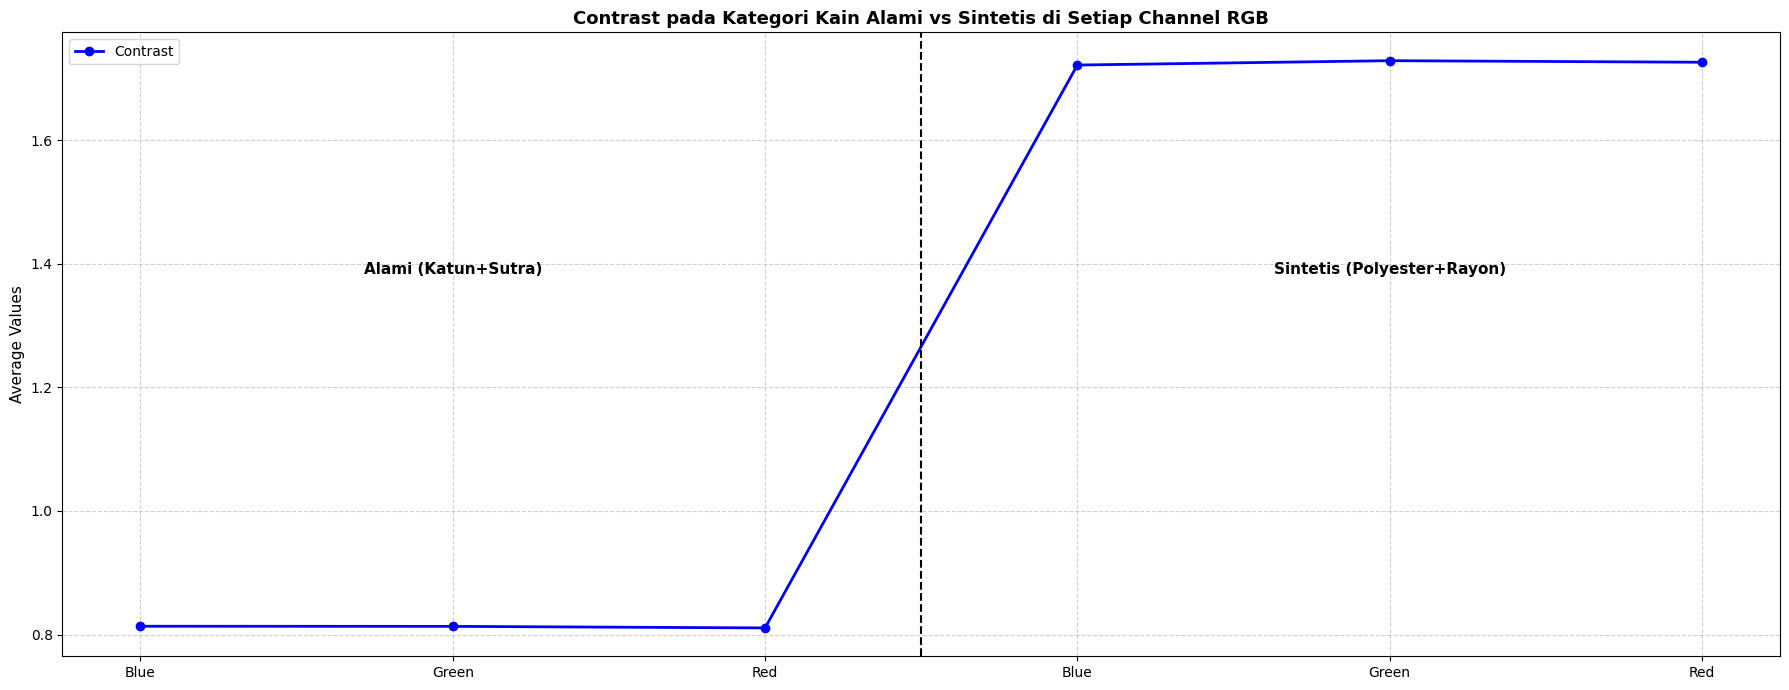

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def plot_feature(feature_name, mean_df_rgb):
    # Ambil rata-rata per kategori
    alami = mean_df_rgb.loc[[f"{feature_name}_B", f"{feature_name}_G", f"{feature_name}_R"],
                            ['Katun_RGB','Sutra_RGB']].mean(axis=1)
    sintetis = mean_df_rgb.loc[[f"{feature_name}_B", f"{feature_name}_G", f"{feature_name}_R"],
                               ['Polyester_RGB','Rayon_RGB']].mean(axis=1)

    # Gabungkan data dalam satu garis
    y_values = list(alami.values) + list(sintetis.values)
    x_labels = ['Blue','Green','Red','Blue','Green','Red']

    x_pos = np.arange(len(x_labels))

    # Plot
    plt.figure(figsize=(18,7))
    plt.plot(x_pos, y_values, marker='o', color='blue', linewidth=2, label=f"{feature_name.capitalize()}")

    # Garis pemisah kategori
    plt.axvline(x=2.5, color='black', linestyle='--')

    # Tambah teks kategori
    plt.text(1, max(y_values)*0.8, "Alami (Katun+Sutra)", ha='center', fontsize=11, fontweight='bold')
    plt.text(4, max(y_values)*0.8, "Sintetis (Polyester+Rayon)", ha='center', fontsize=11, fontweight='bold')

    # Set xticks
    plt.xticks(x_pos, x_labels, fontsize=10)
    plt.ylabel("Average Values", fontsize=11)
    plt.title(f"{feature_name.capitalize()} pada Kategori Kain Alami vs Sintetis di Setiap Channel RGB",
              fontsize=13, fontweight='bold')
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)

    plt.tight_layout()
    plt.show()

# Contoh panggil fungsi
plot_feature("contrast", mean_df_rgb)


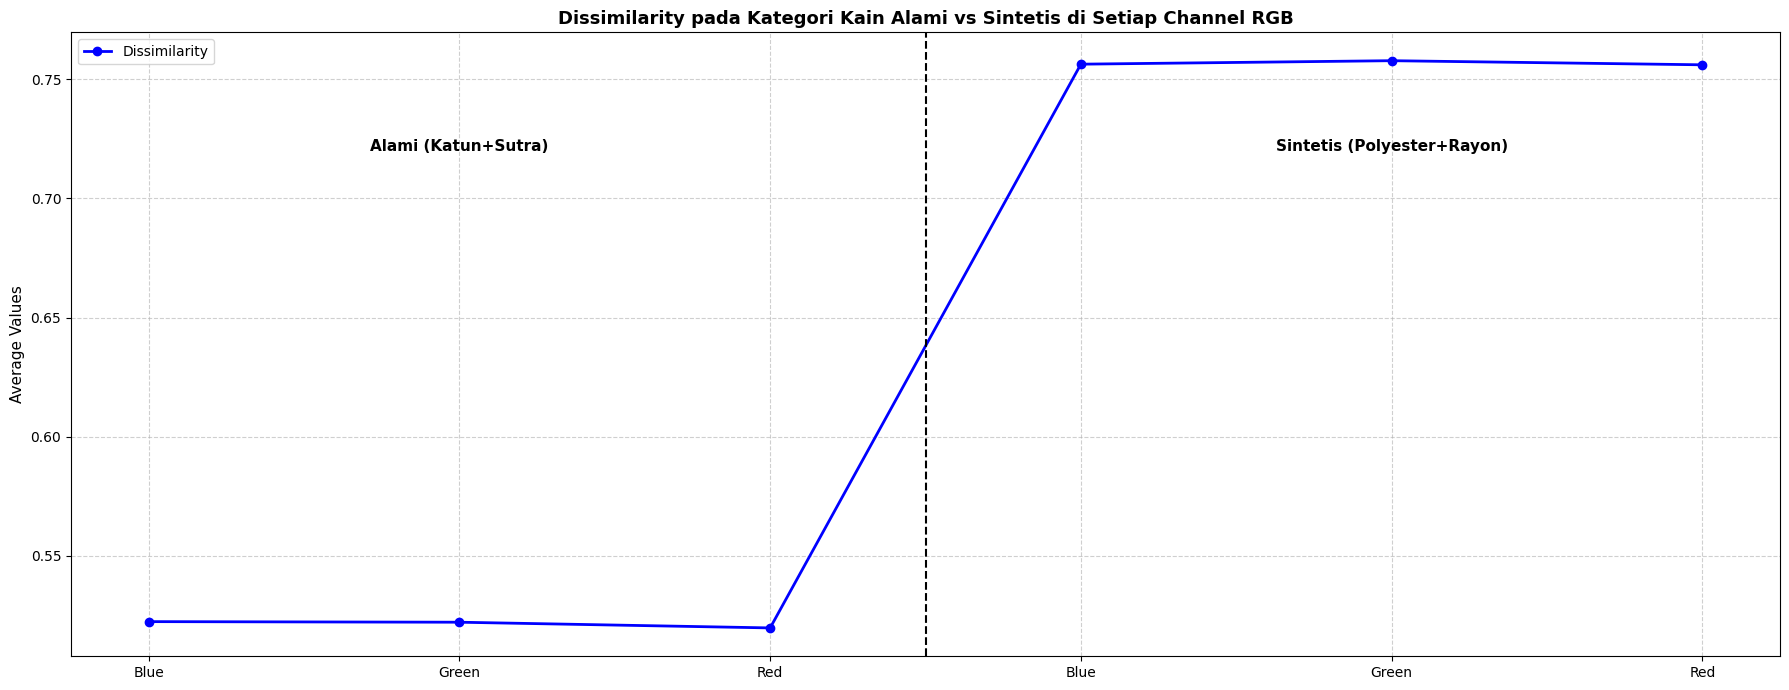

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def plot_feature(feature_name, mean_df_rgb):
    # Ambil rata-rata per kategori
    alami = mean_df_rgb.loc[[f"{feature_name}_B", f"{feature_name}_G", f"{feature_name}_R"],
                            ['Katun_RGB','Sutra_RGB']].mean(axis=1)
    sintetis = mean_df_rgb.loc[[f"{feature_name}_B", f"{feature_name}_G", f"{feature_name}_R"],
                               ['Polyester_RGB','Rayon_RGB']].mean(axis=1)

    # Gabungkan data dalam satu garis
    y_values = list(alami.values) + list(sintetis.values)
    x_labels = ['Blue','Green','Red','Blue','Green','Red']

    x_pos = np.arange(len(x_labels))

    # Plot
    plt.figure(figsize=(18,7))
    plt.plot(x_pos, y_values, marker='o', color='blue', linewidth=2, label=f"{feature_name.capitalize()}")

    # Garis pemisah kategori
    plt.axvline(x=2.5, color='black', linestyle='--')

    # Tambah teks kategori
    plt.text(1, max(y_values)*0.95, "Alami (Katun+Sutra)", ha='center', fontsize=11, fontweight='bold')
    plt.text(4, max(y_values)*0.95, "Sintetis (Polyester+Rayon)", ha='center', fontsize=11, fontweight='bold')

    # Set xticks
    plt.xticks(x_pos, x_labels, fontsize=10)
    plt.ylabel("Average Values", fontsize=11)
    plt.title(f"{feature_name.capitalize()} pada Kategori Kain Alami vs Sintetis di Setiap Channel RGB",
              fontsize=13, fontweight='bold')
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)

    plt.tight_layout()
    plt.show()

# Contoh panggil fungsi
plot_feature("dissimilarity", mean_df_rgb)


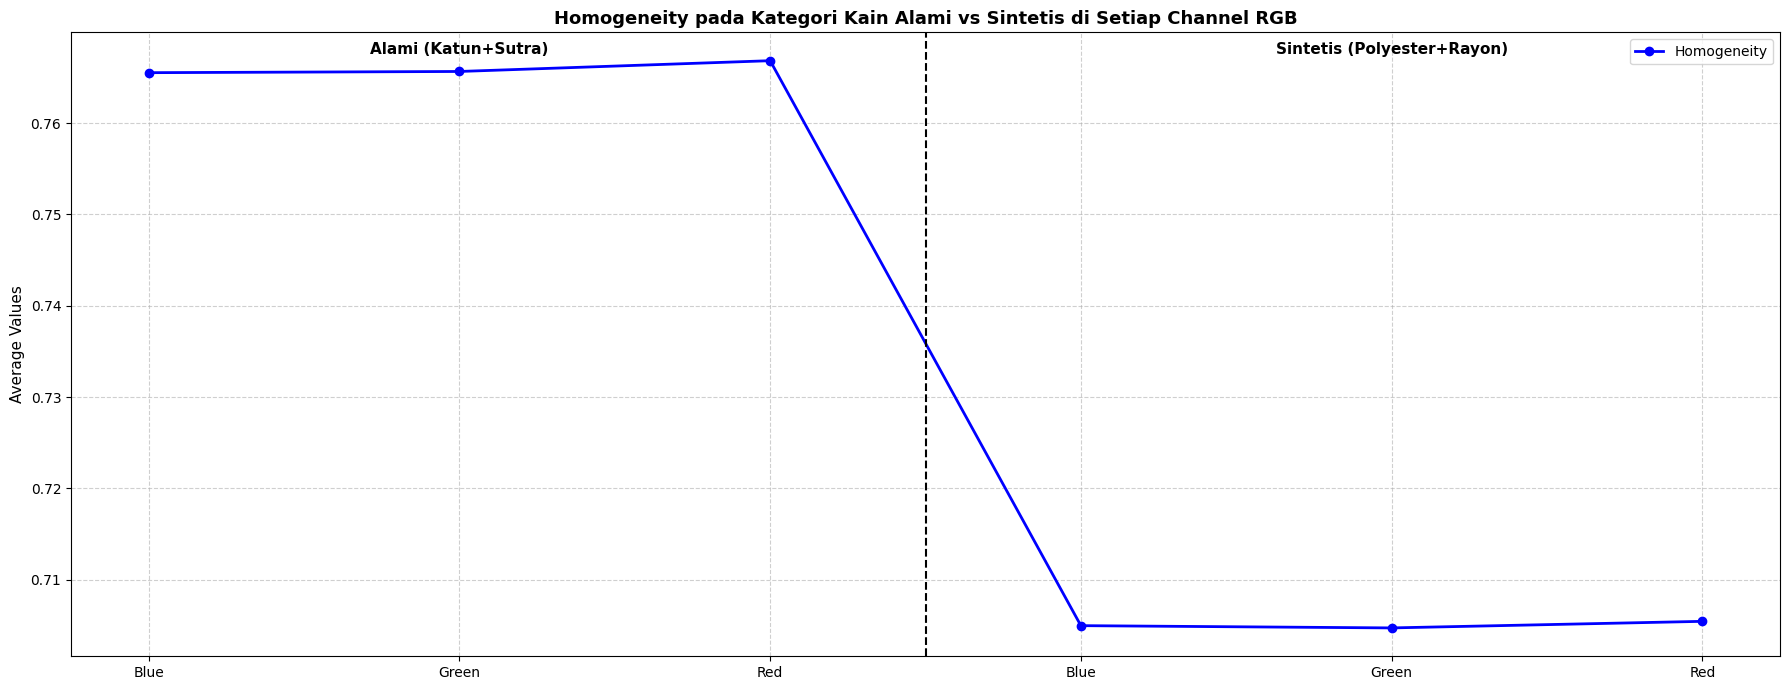

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def plot_feature(feature_name, mean_df_rgb):
    # Ambil rata-rata per kategori
    alami = mean_df_rgb.loc[[f"{feature_name}_B", f"{feature_name}_G", f"{feature_name}_R"],
                            ['Katun_RGB','Sutra_RGB']].mean(axis=1)
    sintetis = mean_df_rgb.loc[[f"{feature_name}_B", f"{feature_name}_G", f"{feature_name}_R"],
                               ['Polyester_RGB','Rayon_RGB']].mean(axis=1)

    # Gabungkan data dalam satu garis
    y_values = list(alami.values) + list(sintetis.values)
    x_labels = ['Blue','Green','Red','Blue','Green','Red']

    x_pos = np.arange(len(x_labels))

    # Plot
    plt.figure(figsize=(18,7))
    plt.plot(x_pos, y_values, marker='o', color='blue', linewidth=2, label=f"{feature_name.capitalize()}")

    # Garis pemisah kategori
    plt.axvline(x=2.5, color='black', linestyle='--')

    # Tambah teks kategori
    plt.text(1, max(y_values)*1.001, "Alami (Katun+Sutra)", ha='center', fontsize=11, fontweight='bold')
    plt.text(4, max(y_values)*1.001, "Sintetis (Polyester+Rayon)", ha='center', fontsize=11, fontweight='bold')

    # Set xticks
    plt.xticks(x_pos, x_labels, fontsize=10)
    plt.ylabel("Average Values", fontsize=11)
    plt.title(f"{feature_name.capitalize()} pada Kategori Kain Alami vs Sintetis di Setiap Channel RGB",
              fontsize=13, fontweight='bold')
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)

    plt.tight_layout()
    plt.show()
# Contoh panggil fungsi

plot_feature("homogeneity", mean_df_rgb)


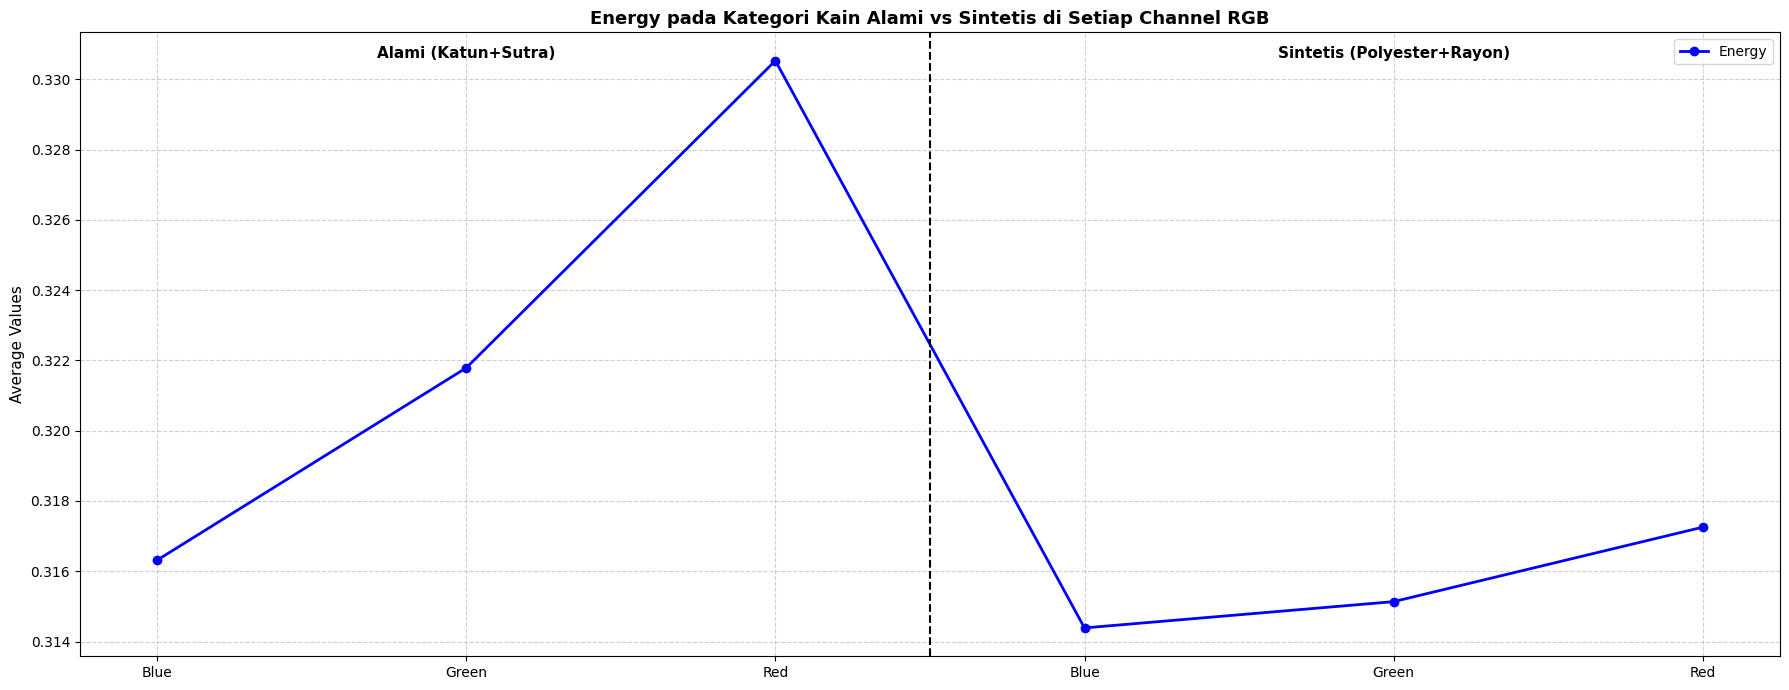

In [13]:
import matplotlib.pyplot as plt
import numpy as np

def plot_feature(feature_name, mean_df_rgb):
    # Ambil rata-rata per kategori
    alami = mean_df_rgb.loc[[f"{feature_name}_B", f"{feature_name}_G", f"{feature_name}_R"],
                            ['Katun_RGB','Sutra_RGB']].mean(axis=1)
    sintetis = mean_df_rgb.loc[[f"{feature_name}_B", f"{feature_name}_G", f"{feature_name}_R"],
                               ['Polyester_RGB','Rayon_RGB']].mean(axis=1)

    # Gabungkan data dalam satu garis
    y_values = list(alami.values) + list(sintetis.values)
    x_labels = ['Blue','Green','Red','Blue','Green','Red']

    x_pos = np.arange(len(x_labels))

    # Plot
    plt.figure(figsize=(18,7))
    plt.plot(x_pos, y_values, marker='o', color='blue', linewidth=2, label=f"{feature_name.capitalize()}")

    # Garis pemisah kategori
    plt.axvline(x=2.5, color='black', linestyle='--')

    # Tambah teks kategori
    plt.text(1, max(y_values)*1.0002, "Alami (Katun+Sutra)", ha='center', fontsize=11, fontweight='bold')
    plt.text(4, max(y_values)*1.0002, "Sintetis (Polyester+Rayon)", ha='center', fontsize=11, fontweight='bold')

    # Set xticks
    plt.xticks(x_pos, x_labels, fontsize=10)
    plt.ylabel("Average Values", fontsize=11)
    plt.title(f"{feature_name.capitalize()} pada Kategori Kain Alami vs Sintetis di Setiap Channel RGB",
              fontsize=13, fontweight='bold')
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)

    plt.tight_layout()
    plt.show()


plot_feature("energy", mean_df_rgb)


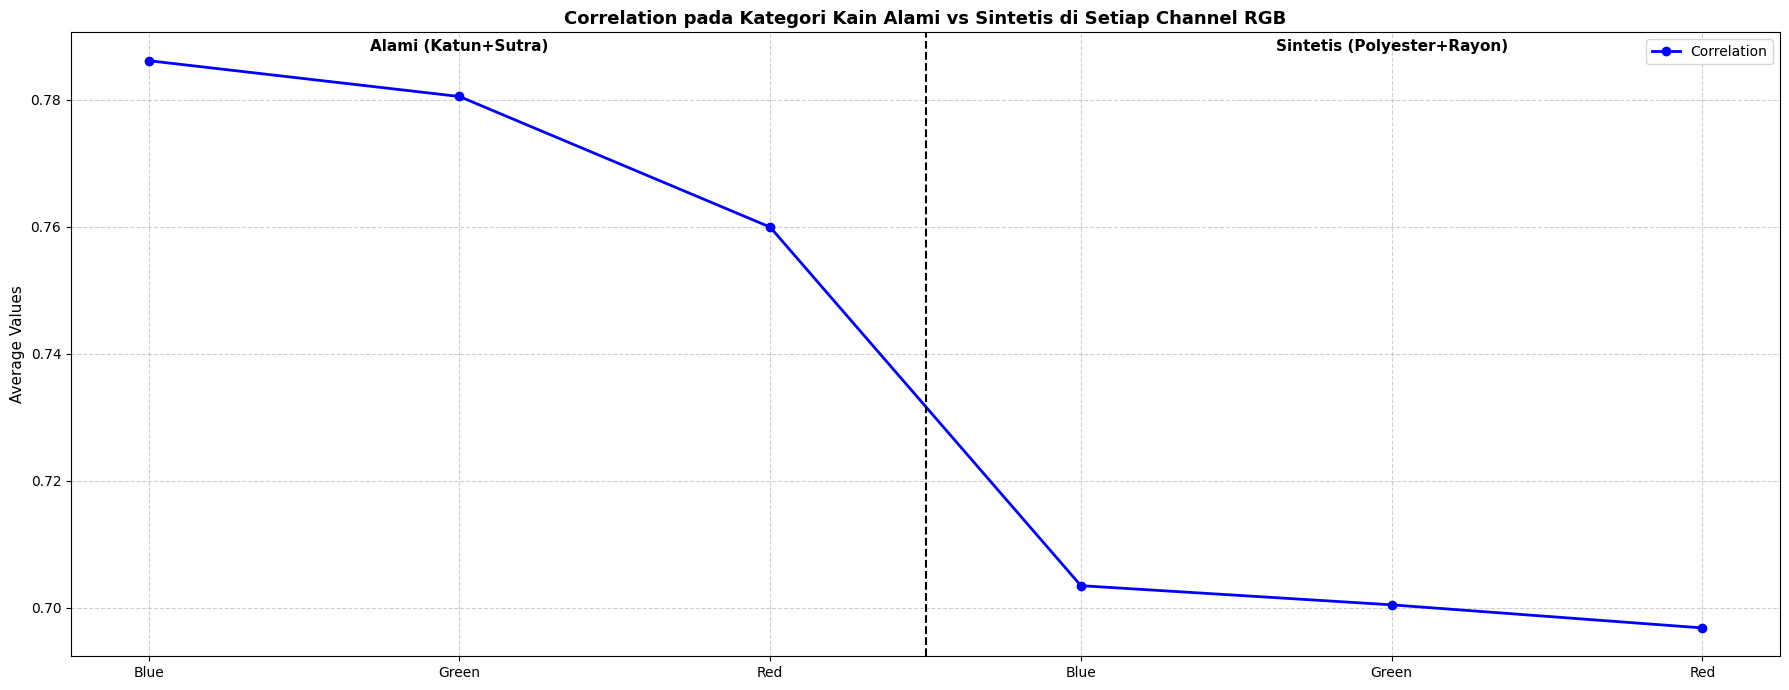

In [14]:
import matplotlib.pyplot as plt
import numpy as np

def plot_feature(feature_name, mean_df_rgb):
    # Ambil rata-rata per kategori
    alami = mean_df_rgb.loc[[f"{feature_name}_B", f"{feature_name}_G", f"{feature_name}_R"],
                            ['Katun_RGB','Sutra_RGB']].mean(axis=1)
    sintetis = mean_df_rgb.loc[[f"{feature_name}_B", f"{feature_name}_G", f"{feature_name}_R"],
                               ['Polyester_RGB','Rayon_RGB']].mean(axis=1)

    # Gabungkan data dalam satu garis
    y_values = list(alami.values) + list(sintetis.values)
    x_labels = ['Blue','Green','Red','Blue','Green','Red']

    x_pos = np.arange(len(x_labels))

    # Plot
    plt.figure(figsize=(18,7))
    plt.plot(x_pos, y_values, marker='o', color='blue', linewidth=2, label=f"{feature_name.capitalize()}")

    # Garis pemisah kategori
    plt.axvline(x=2.5, color='black', linestyle='--')

    # Tambah teks kategori
    plt.text(1, max(y_values)*1.002, "Alami (Katun+Sutra)", ha='center', fontsize=11, fontweight='bold')
    plt.text(4, max(y_values)*1.002, "Sintetis (Polyester+Rayon)", ha='center', fontsize=11, fontweight='bold')

    # Set xticks
    plt.xticks(x_pos, x_labels, fontsize=10)
    plt.ylabel("Average Values", fontsize=11)
    plt.title(f"{feature_name.capitalize()} pada Kategori Kain Alami vs Sintetis di Setiap Channel RGB",
              fontsize=13, fontweight='bold')
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)

    plt.tight_layout()
    plt.show()

plot_feature("correlation", mean_df_rgb)


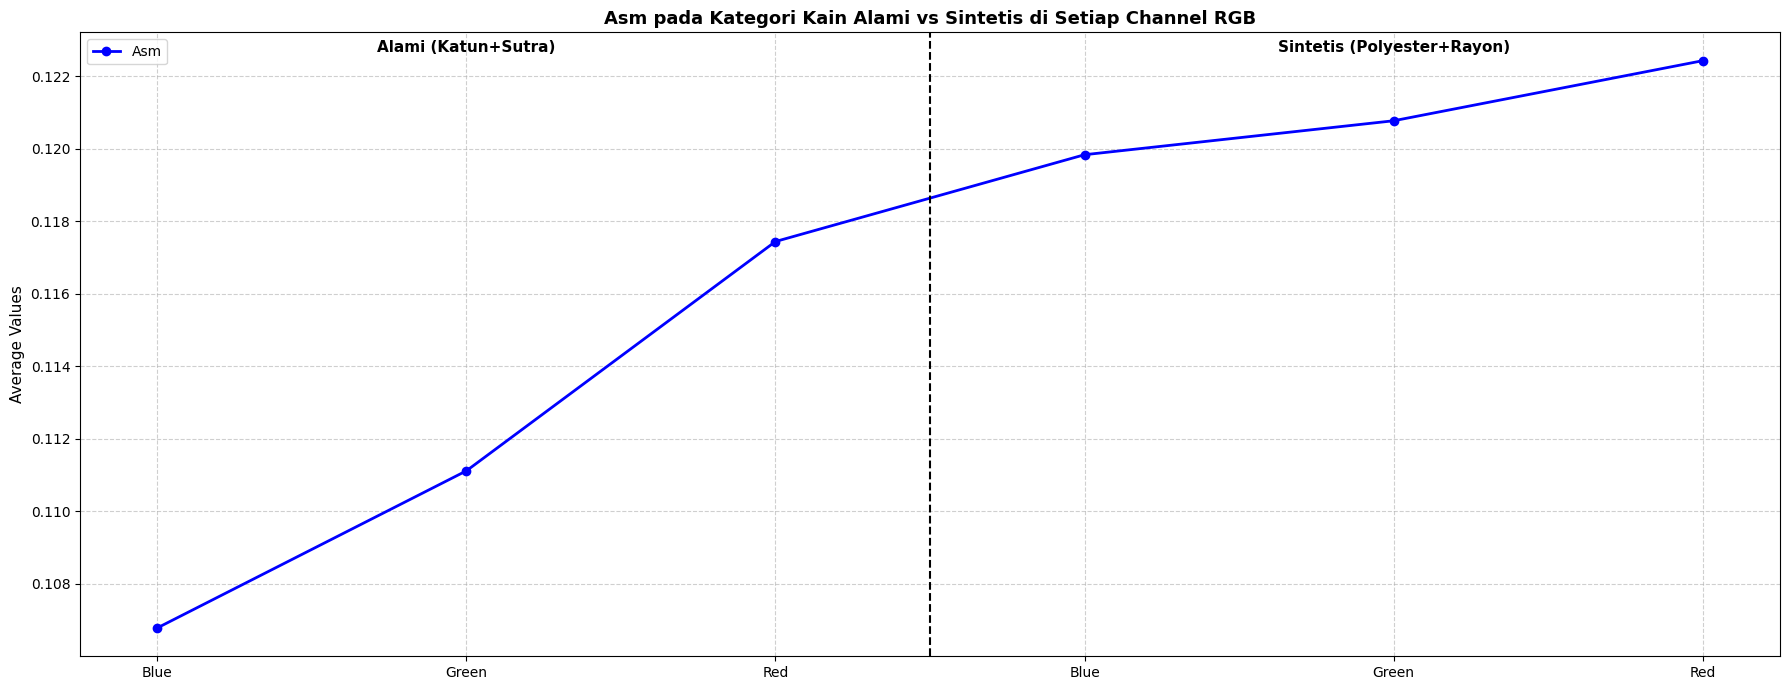

In [15]:
import matplotlib.pyplot as plt
import numpy as np

def plot_feature(feature_name, mean_df_rgb):
    # Ambil rata-rata per kategori
    alami = mean_df_rgb.loc[[f"{feature_name}_B", f"{feature_name}_G", f"{feature_name}_R"],
                            ['Katun_RGB','Sutra_RGB']].mean(axis=1)
    sintetis = mean_df_rgb.loc[[f"{feature_name}_B", f"{feature_name}_G", f"{feature_name}_R"],
                               ['Polyester_RGB','Rayon_RGB']].mean(axis=1)

    # Gabungkan data dalam satu garis
    y_values = list(alami.values) + list(sintetis.values)
    x_labels = ['Blue','Green','Red','Blue','Green','Red']

    x_pos = np.arange(len(x_labels))

    # Plot
    plt.figure(figsize=(18,7))
    plt.plot(x_pos, y_values, marker='o', color='blue', linewidth=2, label=f"{feature_name.capitalize()}")

    # Garis pemisah kategori
    plt.axvline(x=2.5, color='black', linestyle='--')

    # Tambah teks kategori
    plt.text(1, max(y_values)*1.002, "Alami (Katun+Sutra)", ha='center', fontsize=11, fontweight='bold')
    plt.text(4, max(y_values)*1.002, "Sintetis (Polyester+Rayon)", ha='center', fontsize=11, fontweight='bold')

    # Set xticks
    plt.xticks(x_pos, x_labels, fontsize=10)
    plt.ylabel("Average Values", fontsize=11)
    plt.title(f"{feature_name.capitalize()} pada Kategori Kain Alami vs Sintetis di Setiap Channel RGB",
              fontsize=13, fontweight='bold')
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)

    plt.tight_layout()
    plt.show()


plot_feature("asm", mean_df_rgb)


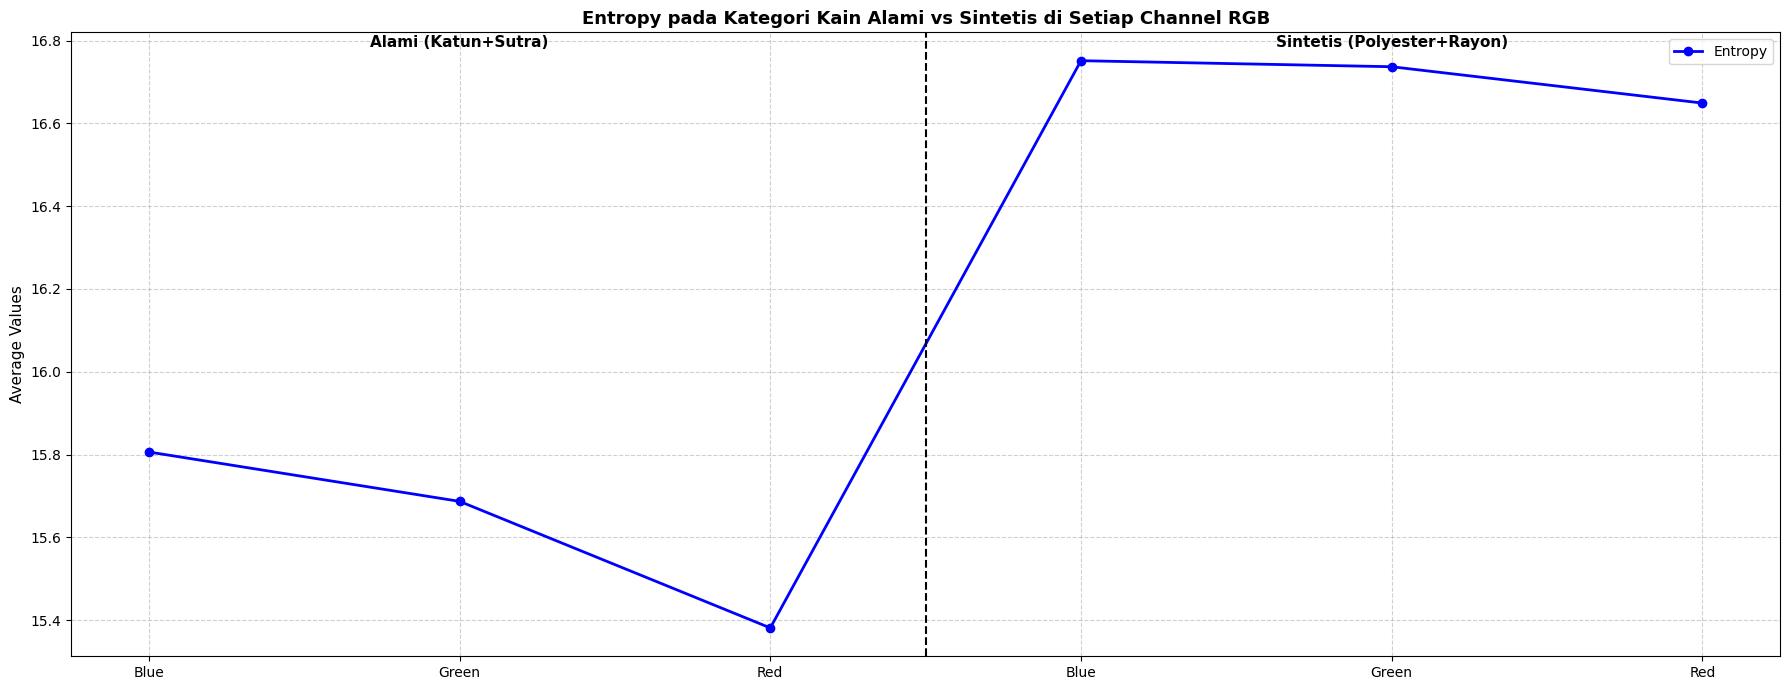

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def plot_feature(feature_name, mean_df_rgb):
    # Ambil rata-rata per kategori
    alami = mean_df_rgb.loc[[f"{feature_name}_B", f"{feature_name}_G", f"{feature_name}_R"],
                            ['Katun_RGB','Sutra_RGB']].mean(axis=1)
    sintetis = mean_df_rgb.loc[[f"{feature_name}_B", f"{feature_name}_G", f"{feature_name}_R"],
                               ['Polyester_RGB','Rayon_RGB']].mean(axis=1)

    # Gabungkan data dalam satu garis
    y_values = list(alami.values) + list(sintetis.values)
    x_labels = ['Blue','Green','Red','Blue','Green','Red']

    x_pos = np.arange(len(x_labels))

    # Plot
    plt.figure(figsize=(18,7))
    plt.plot(x_pos, y_values, marker='o', color='blue', linewidth=2, label=f"{feature_name.capitalize()}")

    # Garis pemisah kategori
    plt.axvline(x=2.5, color='black', linestyle='--')

    # Tambah teks kategori
    plt.text(1, max(y_values)*1.002, "Alami (Katun+Sutra)", ha='center', fontsize=11, fontweight='bold')
    plt.text(4, max(y_values)*1.002, "Sintetis (Polyester+Rayon)", ha='center', fontsize=11, fontweight='bold')

    # Set xticks
    plt.xticks(x_pos, x_labels, fontsize=10)
    plt.ylabel("Average Values", fontsize=11)
    plt.title(f"{feature_name.capitalize()} pada Kategori Kain Alami vs Sintetis di Setiap Channel RGB",
              fontsize=13, fontweight='bold')
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)

    plt.tight_layout()
    plt.show()
plot_feature("entropy", mean_df_rgb)

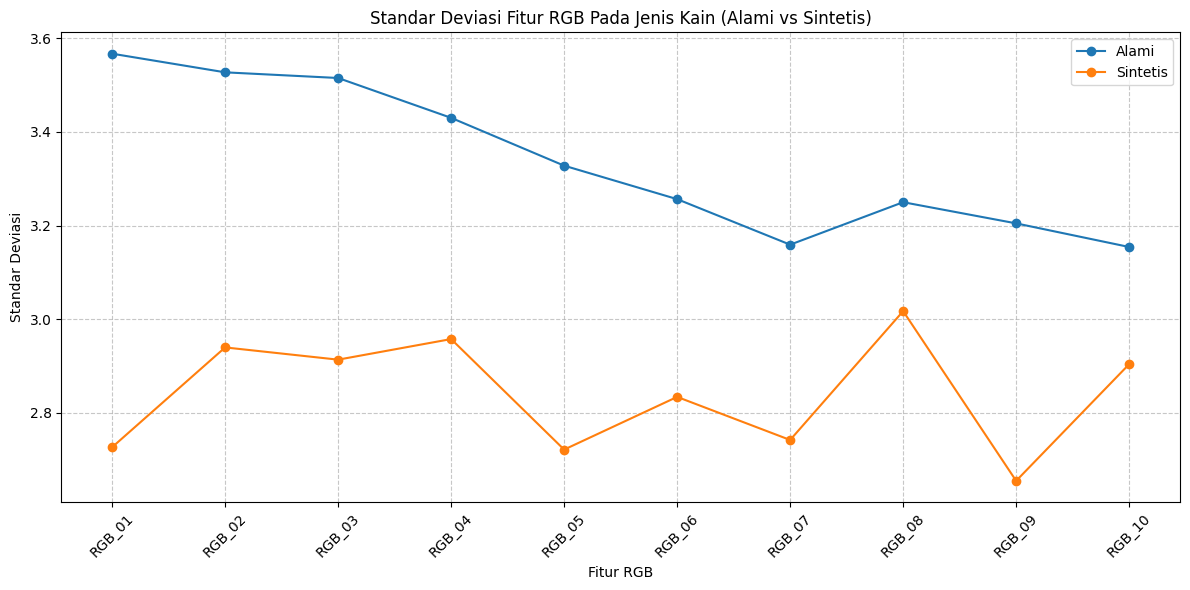

In [17]:
# plot standard deviasi dari rgb berdasarkan 10 sampel gabungan (x = sampel_rgb_00 dan y = std deviasi)
# Ambil 10 sampel pertama untuk setiap jenis kain
sample_size = 10
rgb_samples = rgb_data.groupby('Kategori').head(sample_size)

# Generate x-axis labels (RGB_01 to RGB_10)
x_labels = [f'RGB_{i+1:02d}' for i in range(sample_size)]

# Hitung standar deviasi untuk setiap sampel
std_values = {
    'Alami': [],
    'Sintetis': []
}

for i in range(sample_size):
    for kategori in ['Alami', 'Sintetis']:
        sample_std = rgb_samples[rgb_samples['Kategori'] == kategori].iloc[i:i+1][['mean_R', 'mean_G', 'mean_B']].std(axis=1).values[0]
        std_values[kategori].append(sample_std)


plt.figure(figsize=(12, 6))
plt.plot(x_labels, std_values['Alami'], 'o-', color='#1f77b4', label='Alami')
plt.plot(x_labels, std_values['Sintetis'], 'o-', color='#ff7f0e', label='Sintetis')


plt.title('Standar Deviasi Fitur RGB Pada Jenis Kain (Alami vs Sintetis)')
plt.ylabel('Standar Deviasi')
plt.xlabel('Fitur RGB')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Hitung rata-rata std deviasi per kategori
std_alami = std_df_rgb[['Katun_RGB','Sutra_RGB']].mean(axis=1)
std_sintetis = std_df_rgb[['Polyester_RGB','Rayon_RGB']].mean(axis=1)

# Satukan
compare_std = pd.DataFrame({
    'Alami (Katun+Sutra)': std_alami,
    'Sintetis (Polyester+Rayon)': std_sintetis
})

# Plot bar chart
plt.figure(figsize=(12,6))
x = np.arange(len(compare_std.index))  # posisi fitur
width = 0.35  # lebar bar

plt.bar(x - width/2, compare_std.iloc[:,0], width, label='Alami', color='green', alpha=0.7)
plt.bar(x + width/2, compare_std.iloc[:,1], width, label='Sintetis', color='red', alpha=0.7)

# Format sumbu
plt.xticks(x, compare_std.index, rotation=45, ha='right')
plt.ylabel("Standard Deviation", fontsize=11)
plt.title("Perbandingan Standard Deviation Fitur RGB antara Kain Alami vs Sintetis",
          fontsize=13, fontweight='bold')
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


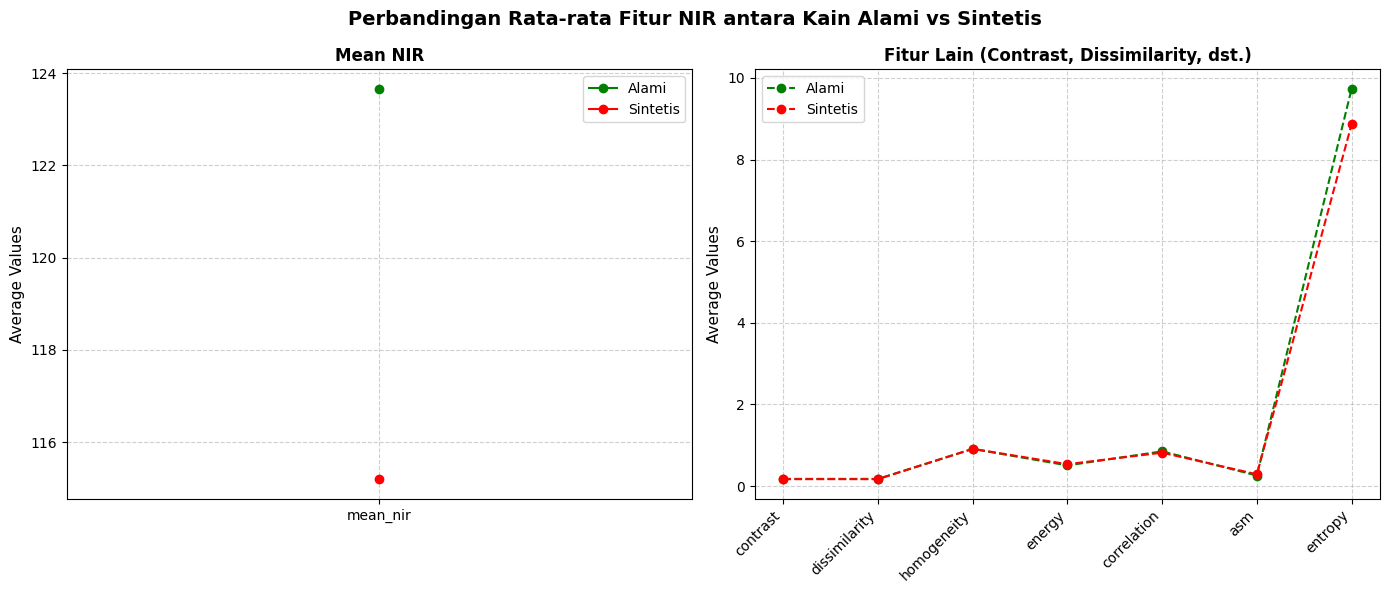

In [19]:
# Hitung rata-rata per kategori
mean_alami_nir = mean_df_nir[['Katun NIR','Sutra NIR']].mean(axis=1)
mean_sintetis_nir = mean_df_nir[['Polyester NIR','Rayon NIR']].mean(axis=1)

# Satukan
compare_mean_nir = pd.DataFrame({
    'Alami (Katun+Sutra)': mean_alami_nir,
    'Sintetis (Polyester+Rayon)': mean_sintetis_nir
})

x = np.arange(len(compare_mean_nir.index))

# Buat 2 subplot sejajar
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))

# ---------------- Plot 1: Mean NIR saja ----------------
ax1.plot([0], compare_mean_nir.iloc[0,0], "o-", color="green", label="Alami")
ax1.plot([0], compare_mean_nir.iloc[0,1], "o-", color="red", label="Sintetis")
ax1.set_xticks([0])
ax1.set_xticklabels([compare_mean_nir.index[0]])
ax1.set_ylabel("Average Values", fontsize=11)
ax1.set_title("Mean NIR", fontsize=12, fontweight="bold")
ax1.legend()
ax1.grid(True, linestyle="--", alpha=0.6)

# ---------------- Plot 2: Fitur lain ----------------
ax2.plot(x[1:], compare_mean_nir.iloc[1:,0], "o--", color="green", label="Alami")
ax2.plot(x[1:], compare_mean_nir.iloc[1:,1], "o--", color="red", label="Sintetis")
ax2.set_xticks(x[1:])
ax2.set_xticklabels(compare_mean_nir.index[1:], rotation=45, ha="right")
ax2.set_ylabel("Average Values", fontsize=11)
ax2.set_title("Fitur Lain (Contrast, Dissimilarity, dst.)", fontsize=12, fontweight="bold")
ax2.legend()
ax2.grid(True, linestyle="--", alpha=0.6)

# Judul utama
fig.suptitle("Perbandingan Rata-rata Fitur NIR antara Kain Alami vs Sintetis", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


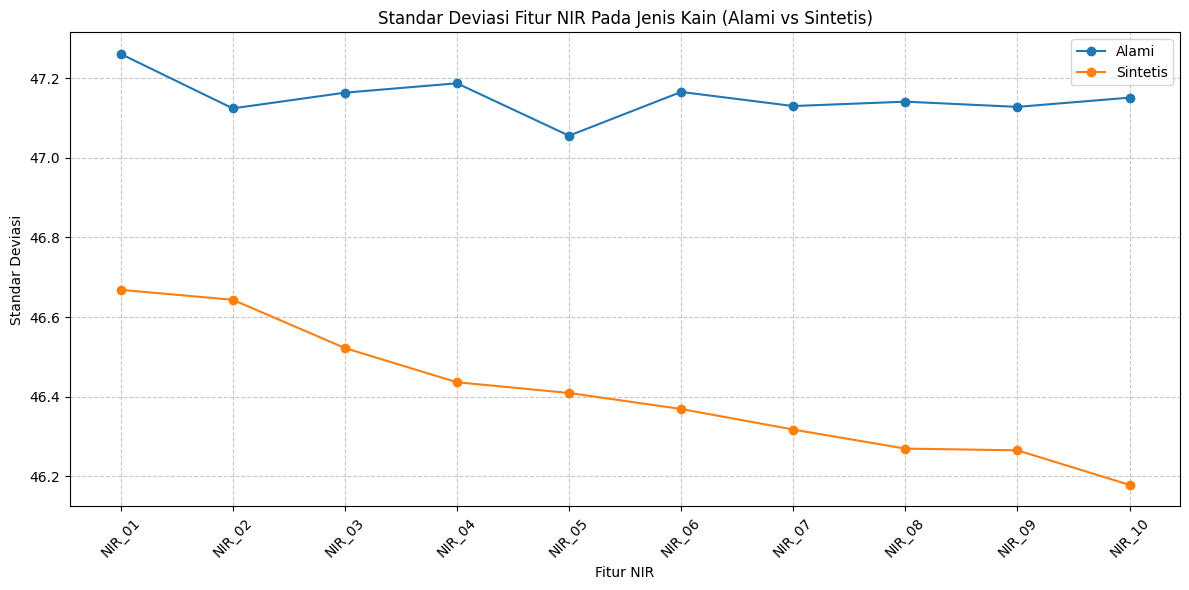


Statistik Deskriptif Standar Deviasi NIR:


,Alami,Sintetis
count,10.000000,10.000000
mean,47.151078,46.407858
std,0.052423,0.163070
min,47.055804,46.178202
25%,47.128809,46.281385
50%,47.146449,46.389088
75%,47.165384,46.500741
max,47.261485,46.668475


In [ ]:
# Visualisasi 3: Standar Deviasi Fitur NIR
# Ambil 10 sampel pertama untuk setiap jenis kain
sample_size = 10
nir_samples = nir_data.groupby('Kategori').head(sample_size)

# Generate x-axis labels (NIR_01 to NIR_10) sampel
x_labels = [f'NIR_{i+1:02d}' for i in range(sample_size)]

# Hitung standar deviasi untuk setiap sampel
std_values = {
    'Alami': [],
    'Sintetis': []
}

# Kolom NIR yang akan digunakan untuk perhitungan standar deviasi
nir_features = ['mean_nir', 'contrast', 'dissimilarity', 'homogeneity', 
                'energy', 'correlation', 'asm']

for i in range(sample_size):
    for kategori in ['Alami', 'Sintetis']:
        sample_std = nir_samples[nir_samples['Kategori'] == kategori].iloc[i:i+1][nir_features].std(axis=1).values[0]
        std_values[kategori].append(sample_std)

plt.figure(figsize=(12, 6))
plt.plot(x_labels, std_values['Alami'], 'o-', color='#1f77b4', label='Alami')
plt.plot(x_labels, std_values['Sintetis'], 'o-', color='#ff7f0e', label='Sintetis')

plt.title('Standar Deviasi Fitur NIR Pada Jenis Kain (Alami vs Sintetis)')
plt.ylabel('Standar Deviasi')
plt.xlabel('Fitur NIR')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Tampilkan statistik deskriptif untuk nilai standar deviasi
print("\nStatistik Deskriptif Standar Deviasi NIR:")
std_df = pd.DataFrame(std_values)
display(std_df.describe())# Visualisasi 3: Standar Deviasi Fitur NIR


In [ ]:
# Hitung std deviasi per kategori
std_alami_nir = std_df_nir[['Katun NIR','Sutra NIR']].mean(axis=1)
std_sintetis_nir = std_df_nir[['Polyester NIR','Rayon NIR']].mean(axis=1)

# Satukan
compare_std_nir = pd.DataFrame({
    'Alami (Katun+Sutra)': std_alami_nir,
    'Sintetis (Polyester+Rayon)': std_sintetis_nir
})

x = np.arange(len(compare_std_nir.index))
width = 0.35

# Buat 2 subplot sejajar
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))

# ---------------- Plot 1: Std Deviasi Mean NIR ----------------
ax1.bar([0 - width/2], compare_std_nir.iloc[0,0], width, color="green", alpha=0.7, label="Alami")
ax1.bar([0 + width/2], compare_std_nir.iloc[0,1], width, color="red", alpha=0.7, label="Sintetis")
ax1.set_xticks([0])
ax1.set_xticklabels([compare_std_nir.index[0]])
ax1.set_ylabel("Standard Deviation", fontsize=11)
ax1.set_title("Std Deviasi - Mean NIR", fontsize=12, fontweight="bold")
ax1.legend()
ax1.grid(axis="y", linestyle="--", alpha=0.6)

# ---------------- Plot 2: Std Deviasi Fitur lain ----------------
ax2.bar(x[1:] - width/2, compare_std_nir.iloc[1:,0], width, color="green", alpha=0.7, label="Alami")
ax2.bar(x[1:] + width/2, compare_std_nir.iloc[1:,1], width, color="red", alpha=0.7, label="Sintetis")
ax2.set_xticks(x[1:])
ax2.set_xticklabels(compare_std_nir.index[1:], rotation=45, ha="right")
ax2.set_ylabel("Standard Deviation", fontsize=11)
ax2.set_title("Std Deviasi - Fitur Lain", fontsize=12, fontweight="bold")
ax2.legend()
ax2.grid(axis="y", linestyle="--", alpha=0.6)

# Judul utama
fig.suptitle("Perbandingan Standard Deviation Fitur NIR antara Kain Alami vs Sintetis", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()
